In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/RA2_alpine_lads')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import os
import tensorflow as tf
import tensorflow_addons as tfa
from utils.config import Config
import dataset.train_dataset as dtd
import PIL
import PIL.ImageOps
from tensorflow.keras.utils import plot_model
Configuration = Config()
from tensorflow.keras.models import load_model
from model import NASnet_multioutput
import itertools
import seaborn as sns

AUTOTUNE = tf.data.experimental.AUTOTUNE

from dataset import dataset_ops
import dataset.image_ops as ops
from dataset import landmarks_pretrain_dataset as land_pre
from model import landmarks_model

In [3]:
# reload the library
import importlib
import types
import os

def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        importlib.reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)



In [14]:
dataset = land_pre.landmark_pretrain_faces_dataset(Configuration)
faces, faces_val = dataset.create_train_dataset()

WARNING - Missing permissions to create directory for caching!
WARNING - Missing permissions to create directory for caching!


In [7]:
# medium
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu",input_shape=[Configuration.landmarks_img_height,Configuration.landmarks_img_width,1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 256, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 256, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),

])

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='linear'))

model.load_weights("weights/FACE_LANDMARK_medium_model_45")

In [5]:
#     original, the one i don't know how many epochs i did
# need to retrain to make it comparable
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size=(3,3),activation="relu",input_shape=[Configuration.landmarks_img_height,Configuration.landmarks_img_width,1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 16, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),

])
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='linear'))

model.load_weights("weights/FACE_LANDMARK_original_model_45")

In [ ]:
# shallow
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size=(3,3),activation="relu",input_shape=[Configuration.landmarks_img_height,Configuration.landmarks_img_width,1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
])
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='linear'))

model.load_weights("weights/FACE_LANDMARK_shallow_model_45")

In [15]:
# larger kernel
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size=(5,5),activation="relu",input_shape=[Configuration.landmarks_img_height,Configuration.landmarks_img_width,1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 16, kernel_size=(5,5),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(5,5),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size=(5,5),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),

])

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='linear'))

model.load_weights("weights/FACE_LANDMARK_big_kernel_model_45")

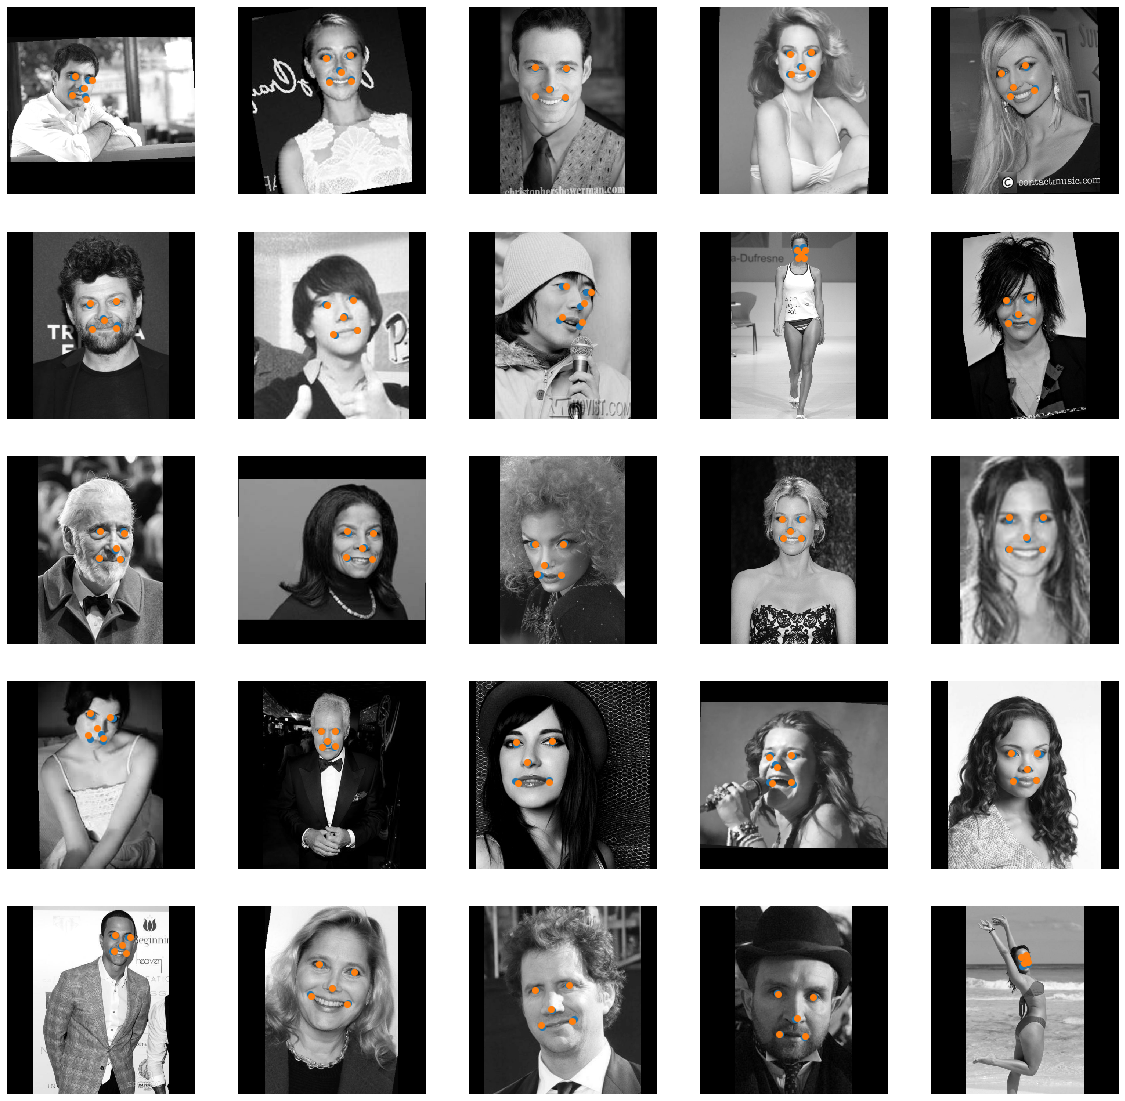

In [16]:
for a,b in faces_val.skip(50).take(1):
    h = model.predict(a)
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :,0],cmap="gray")
        plt.scatter(np.array(b[n])[[0,2,4,6,8]],np.array(b[n])[[1,3,5,7,9]])
        plt.scatter(np.array(h[n])[[0,2,4,6,8]],np.array(h[n])[[1,3,5,7,9]])
        plt.axis('off')

## joints

In [14]:
# medium model
joints_model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu",input_shape=[Configuration.landmarks_img_height,Configuration.landmarks_img_width,1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 256, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 256, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),

])
joints_model.add(keras.layers.Dense(256, activation='relu'))
joints_model.add(keras.layers.BatchNormalization())
joints_model.add(keras.layers.Dense(12, activation='linear'))

joints_model.load_weights("weights/FEET_LANDMARK_medium_model_145")

In [7]:
#     original, the one i don't know how many epochs i did
# need to retrain to make it comparable
joints_model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size=(3,3),activation="relu",input_shape=[Configuration.landmarks_img_height,Configuration.landmarks_img_width,1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 16, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),

])
joints_model.add(keras.layers.Dense(256, activation='relu'))
joints_model.add(keras.layers.BatchNormalization())
joints_model.add(keras.layers.Dense(12, activation='linear'))

joints_model.load_weights("weights/FEET_LANDMARK_original_model_145")

In [10]:
# shallow model
joints_model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size=(3,3),activation="relu",input_shape=[Configuration.landmarks_img_height,Configuration.landmarks_img_width,1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
])
joints_model.add(keras.layers.Dense(256, activation='relu'))
joints_model.add(keras.layers.BatchNormalization())
joints_model.add(keras.layers.Dense(12, activation='linear'))

joints_model.load_weights("weights/FEET_LANDMARK_shallow_model_145")

In [10]:
# larger kernel
joints_model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size=(5,5),activation="relu",input_shape=[Configuration.landmarks_img_height,Configuration.landmarks_img_width,1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 16, kernel_size=(5,5),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(5,5),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size=(5,5),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),

])

joints_model.add(keras.layers.Dense(256, activation='relu'))
joints_model.add(keras.layers.BatchNormalization())
joints_model.add(keras.layers.Dense(12, activation='linear'))

joints_model.load_weights("weights/FEET_LANDMARK_big_kernel_model_145")

In [11]:
from dataset.landmarks_dataset import landmarks_dataset as ld

landmark_dataset = ld(Configuration).create_landmarks_dataset()

WARNING - Missing permissions to create directory for caching!


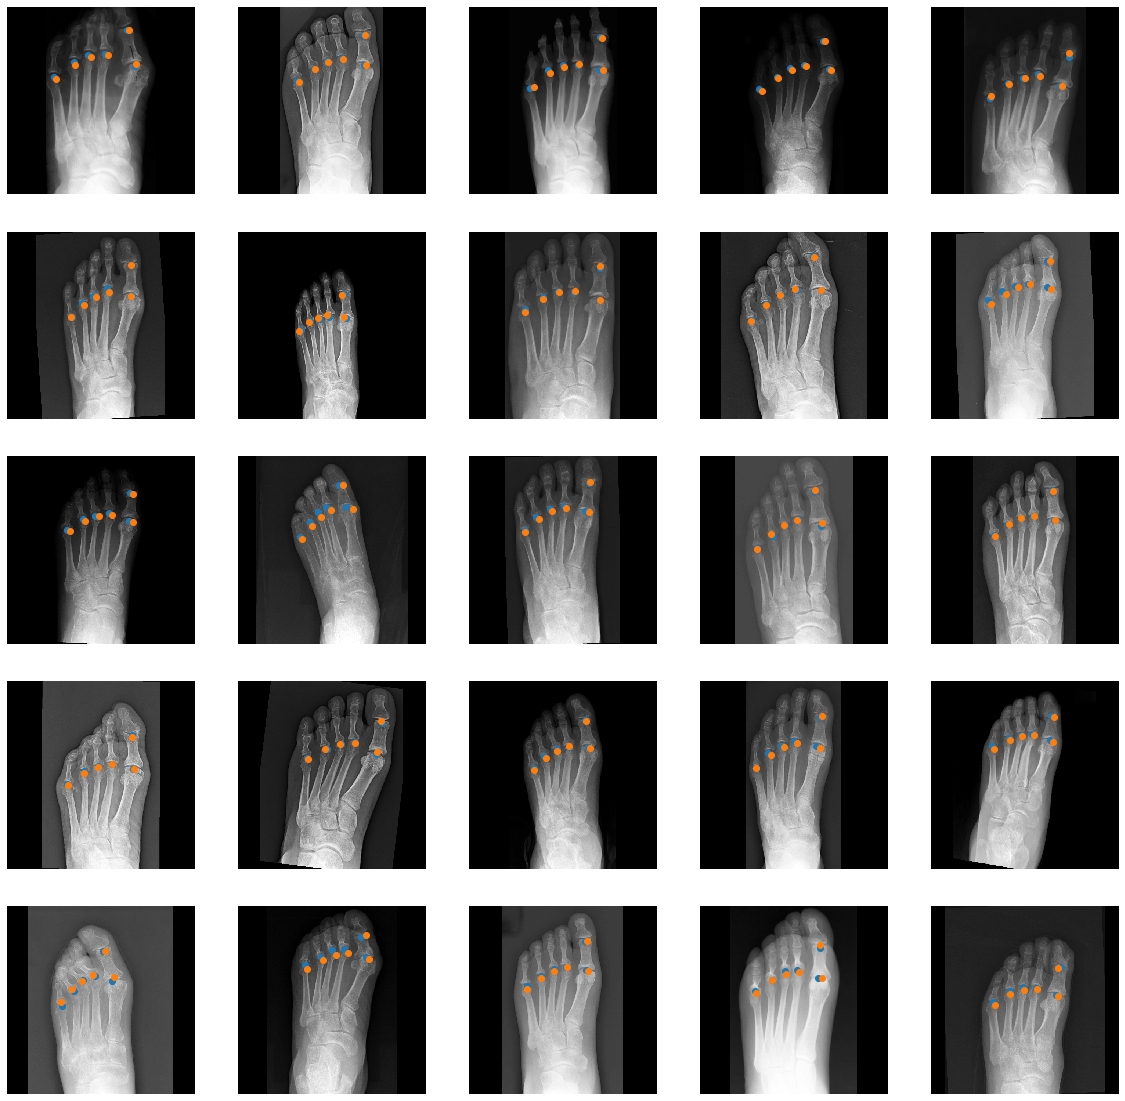

In [12]:
for a,b in landmark_dataset.take(1):
    h = joints_model.predict(a)
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :,0],cmap="gray")
        plt.scatter(np.array(b[n])[[0,2,4,6,8,10]],np.array(b[n])[[1,3,5,7,9,11]])
        plt.scatter(np.array(h[n])[[0,2,4,6,8,10]],np.array(h[n])[[1,3,5,7,9,11]])
        plt.axis('off')

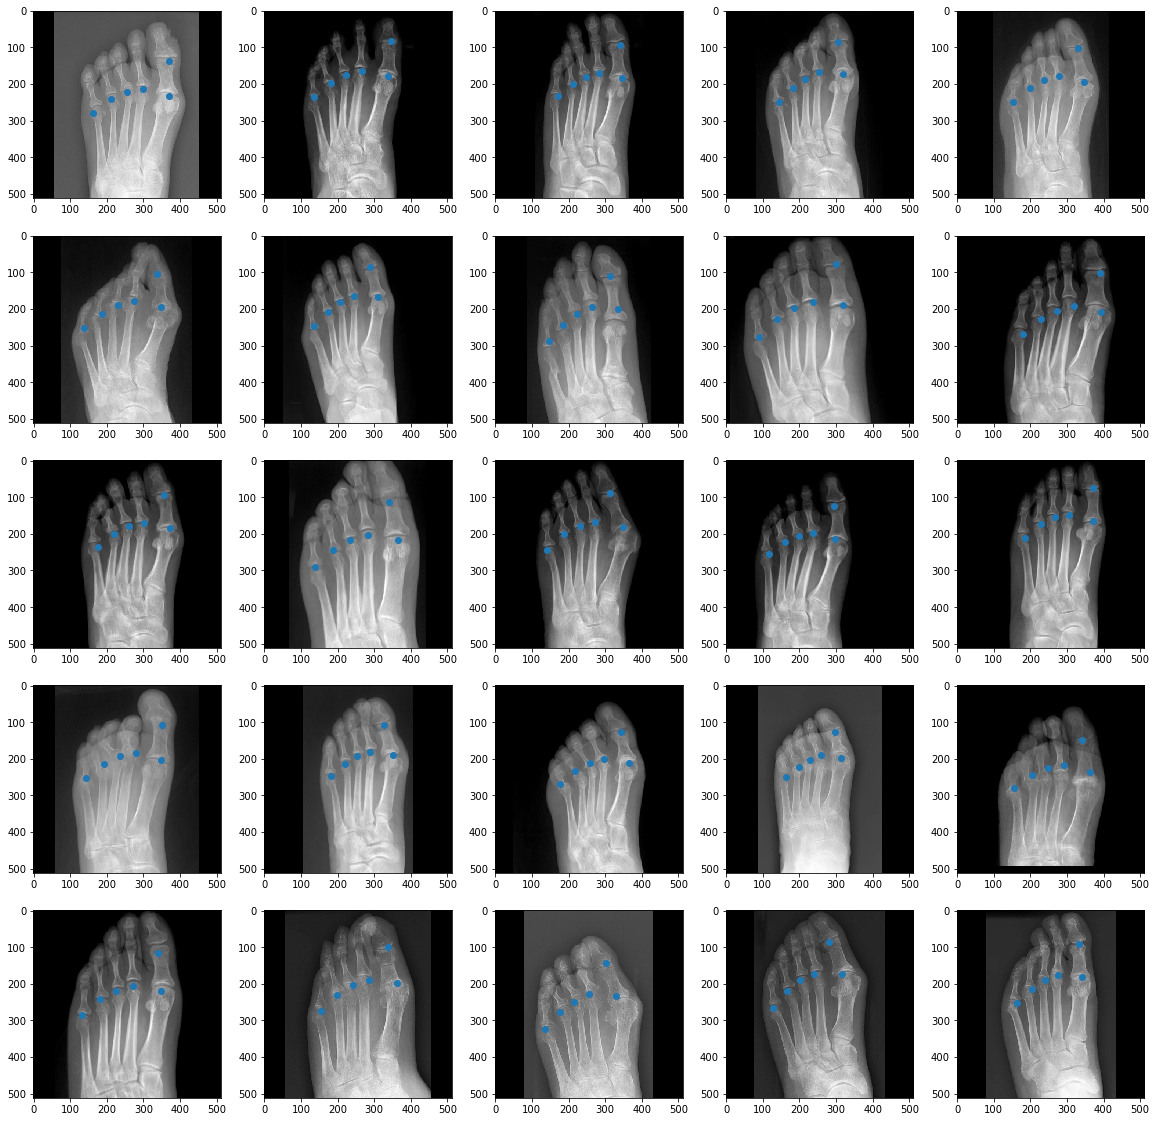

In [13]:
from PIL import Image, ImageOps
images = ["UAB651-LF.jpg",
"UAB653-LF.jpg",
"UAB654-LF.jpg",
"UAB659-LF.jpg",
"UAB661-LF.jpg",
"UAB665-LF.jpg",
"UAB666-LF.jpg",
"UAB667-LF.jpg",
"UAB669-LF.jpg",
"UAB671-LF.jpg",
"UAB672-LF.jpg",
"UAB675-LF.jpg",
"UAB678-LF.jpg",
"UAB679-LF.jpg",
"UAB680-LF.jpg",
"UAB683-LF.jpg",
"UAB687-LF.jpg",
"UAB688-LF.jpg",
"UAB690-LF.jpg",
"UAB692-LF.jpg",
"UAB694-LF.jpg",
"UAB697-LF.jpg",
"UAB698-LF.jpg",
"UAB700-LF.jpg",
"UAB701-LF.jpg",
"UAB702-LF.jpg",
"UAB703-LF.jpg",
"UAB704-LF.jpg",
"UAB706-LF.jpg",
"UAB707-LF.jpg",
"UAB708-LF.jpg",
"UAB711-LF.jpg",
"UAB716-LF.jpg",
"UAB717-LF.jpg",
"UAB719-LF.jpg",
"UAB720-LF.jpg",
"UAB722-LF.jpg",
]
desired_size = 512
plt.figure(figsize=(20,20))
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    im = Image.open("/mnt/iusers01/jw01/mdefscs4/ra_challenge/RA_challenge/training_dataset/" + images[i]).convert('L')
    old_size = im.size  # old_size[0] is in (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_im = Image.new("L", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))

    im = new_im
    h = joints_model.predict(np.array(im).reshape((1,512,512,1))/255.0)
    plt.imshow(np.array(im).reshape((512,512,1))[:, :,0],cmap="gray")
    plt.scatter(np.array(h[0])[[0,2,4,6,8,10]],np.array(h[0])[[1,3,5,7,9,11]])

37